
## Lineární regrese pro předpověď šance přijetí na vysokou školu

Cíl:
Vytvořit model lineární regrese, který na základě dostupných údajů předpoví šanci na přijetí na vysokou školu.

**Dataset**

Dataset obsahuje následující proměnné: 
- GRE Score, Test Graduate Record Examinations (maximálně 340 bodů)
- TOEFL Score, Test znalostí angličtiny jako cizího jazyka (maximálně 120 bodů)
- University Rating, Hodnocení univerzity (1 až 5 bodů)
- SOP, Síla motivačního dopisu a doporučení (1 až 5 bodů)
- LOR, Doporučující dopis 
- CGPA, Průměrná známka z bakalářského studia ( maximálně 10 bodů)
- Research, Zkušenosti s výzkumem (buď 0 nebo 1)
- Chance of Admit, Šance na přijetí (hodnota mezi 0 a 1)

### Úkoly 

**Příprava dat**

- 1. Načtěte dataset a ujistěte se, že rozumíte hodnotám ve sloupcích. Můžete změnit názvy sloupců a odstranit mezery, což se vám může později hodit.

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt


data = pd.read_csv("adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns = data.columns.str.strip()
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [25]:
# Kontrola chybějících hodnot
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


**Normálnost dat pro TOEFL skóre**

- 1. Vypočítejte průměr a medián pro TOEFL skóre
- 2. Vypočítejte směrodatnou odchylku


In [5]:
print(data["TOEFL Score"].mean())
print(data["TOEFL Score"].median())
print(data["TOEFL Score"].std())
print(data["TOEFL Score"].min())
print(data["TOEFL Score"].max())

107.41
107.0
6.069513777374126
92
120


In [6]:
data["TOEFL Score"].value_counts()

TOEFL Score
110    37
105    28
107    26
104    25
106    24
112    21
100    19
99     18
111    17
108    17
102    17
109    17
103    16
114    15
113    14
101    11
116    11
98      9
118     9
119     9
115     9
120     8
117     7
97      6
96      4
93      2
95      2
94      1
92      1
Name: count, dtype: int64

- 3. Vytvořte histogram pro TOEFL skóre a nezapomeňte zobrazit odhadovanou křivku pravděpodobnostího rozdělení.

<Axes: xlabel='TOEFL Score', ylabel='Count'>

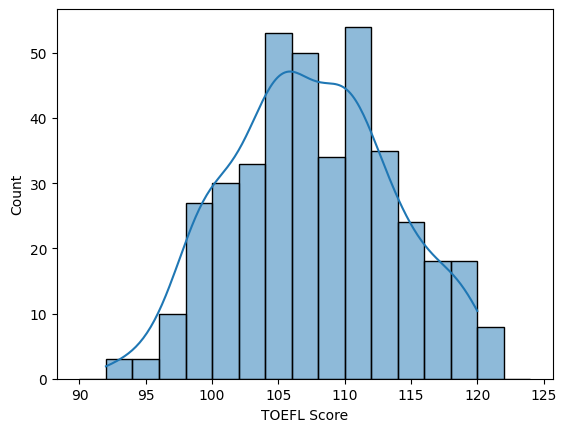

In [7]:
sns.histplot(data=data, x="TOEFL Score", bins=range(90, 125, 2), kde=True)

- 4. Otestujte, zda je TOEFL skóre vybráno znormálního rozdělení pomocí
statistického testu. Uvažujte hladinu vyznamnosti = 5%.

H0: Data mají normální rozdělení.

H1: Data nemají normální rozdělení.

In [47]:
statistic, pvalue = stats.normaltest(data["TOEFL Score"])
if pvalue < 0.05:
    print(f"Hodnota p-value je {pvalue}. Zamítáme H0. TOEFL skóre není z normálního rozdělení.")
else:
    print(f"Hodnota p-value je {pvalue}. Platí H0. TOEFL skóre je z normálního rozdělení.")

Hodnota p-value je 0.003945790155853822. Zamítáme H0. TOEFL skóre není z normálního rozdělení.


Závěr: data nejsou z normálního rozdělení.

**Testování hypotéz**
- 1. Rozdělte data na studenty, kteří mají a nemají zkušenost s výzkumem. 
- 2. Pro obě skupiny spočítejte průměrné GRE skóre. 

In [9]:
data["Research"].value_counts()

Research
1    219
0    181
Name: count, dtype: int64

In [10]:
research_yes = data[data["Research"] == 1]
research_no = data[data["Research"] == 0]
print(research_yes["GRE Score"].mean())
print(research_no["GRE Score"].mean())

322.85388127853884
309.49171270718233


- 3. Statisticky otestujte, zda existuje statisticky význámný rozdíl v GRE skóre
mezi těmito dvěma skupinami studentů. Vyberte správný test a nezapomeňte krátce okomentovat vyhodnocení testu.

In [45]:
statistic, pvalue = stats.normaltest(research_yes["GRE Score"])     # data nejsou z normálního rozdělení
if pvalue < 0.05:
    print(f"Hodnota p-value je {pvalue}. Zamítáme H0. Data GRE skóre nejsou z normálního rozdělení.")
else:
    print(f"Hodnota p-value je {pvalue}. Platí H0. Data GRE skóre jsou z normálního rozdělení.")

Hodnota p-value je 0.005145412486026274. Zamítáme H0. Data GRE skóre nejsou z normálního rozdělení.


In [46]:
statistic, pvalue = stats.normaltest(research_no["GRE Score"])      # data jsou z normálního rozdělení
if pvalue < 0.05:
    print(f"Hodnota p-value je {pvalue}. Zamítáme H0. Data GRE skóre nejsou z normálního rozdělení.")
else:
    print(f"Hodnota p-value je {pvalue}. Platí H0. Data GRE skóre jsou z normálního rozdělení.")

Hodnota p-value je 0.6076717821415273. Platí H0. Data GRE skóre jsou z normálního rozdělení.


**HO**: Neexistuje žádný rozdíl v průměrných hodnotách skóre GRE mezi studenty se zkušenostmi s výzkumem a studenty bez zkušeností s výzkumem.

**H1**: Existuje statisticky významný rozdíl v průměrných hodnotách skóre GRE mezi studenty se zkušenostmi s výzkumem a studenty bez zkušeností s výzkumem.

Jelikož data u jedné ze skupin (research_yes) nepochází z normálního rozdělení, použiji Mann-Whitneyho U test.
Hladina významnosti 5%.

In [44]:
statistic, pvalue = stats.mannwhitneyu(research_yes["GRE Score"], research_no["GRE Score"])
if pvalue < 0.05:
    print(f"Hodnota p-value je {pvalue}. Zamítáme H0. Existuje statisticky významný rozdíl v skóre GRE mezi studenty se zkušenostmi s výzkumem a studenty bez zkušeností s výzkumem.")
else:
    print(f"Hodnota p-value je {pvalue}. Neexistuje žádný rozdíl v průměrných hodnotách skóre GRE mezi studenty se zkušenostmi s výzkumem a studenty bez zkušeností s výzkumem.")

Hodnota p-value je 1.1433386421648098e-32. Zamítáme H0. Existuje statisticky významný rozdíl v skóre GRE mezi studenty se zkušenostmi s výzkumem a studenty bez zkušeností s výzkumem.


**Výsledek**: p-value < 0.05, zamítáme H0. Mezi oběma skupiname existuje statisticky významný rozdíl.

**Korelace**
- 1. Vypočítejte korelaci mezi TOEFL a GRE skóre
- 2. Krátce okomentujte, co znamená vypočítaná korelace. Je tato korelace pozitivní/negativni?
- 3. Vytvořte korelační graf (sns.regplot) pro vysvětlovanou proměnnou šance na přijetí (Chance of Admit)
a proměnnou, která je s ní nejvíce korelovaná.

In [48]:
correlation = data["TOEFL Score"].corr(data["GRE Score"])
print("Korelace mezi TOEFL a GRE skóre:", correlation)

Korelace mezi TOEFL a GRE skóre: 0.8359768030143963


Korelace mezi TOEFL a GRE skóre je pozitivní, je mezi nimi přímá lineární zásvislost (hodnoty rostou v obou sloupcích současně).

In [15]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Nejvíce korelovaná proměnná s vysvětlovanou proměnnou Chance of Admit je CGPA (0.873).

Vytvoříme korelační graf - vysvětlovaná proměnná - Chance of Admit, vysvětlující proměnná - CGPA (Průměrná známka z bak. studia)

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

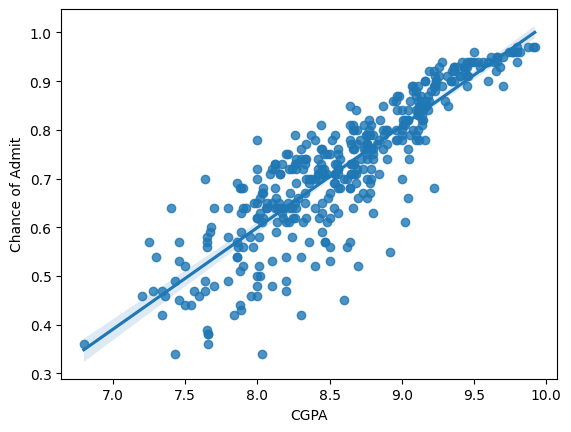

In [50]:
sns.regplot(data, x="CGPA", y="Chance of Admit")

**Vysvětlovaná proměnná**

- 1. Naší vysvětlovanou proměnnou bude šance na přijetí (Chance of Admit).
     Vytvořte boxplot pro tuto proměnnou, aby bylo možné vituálně identifikovat případné odlehlé hodnoty.
- 2. Odstraňte odlehlé pozorování na základě kriterií zjištěných z boxplotu.

<Axes: xlabel='Chance of Admit'>

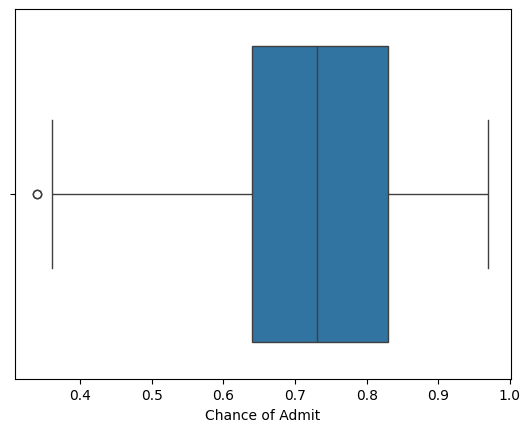

In [53]:
sns.boxplot(data, x="Chance of Admit")

Určíme hranice pro odstranění odlehlých hodnot:

In [54]:
q1 = np.quantile(data["Chance of Admit"], 0.25)
q3 = np.quantile(data["Chance of Admit"], 0.75)

range = (q3 - q1)
lower_bound = q1 - 1.5 * range
upper_bound = q3 + 1.5 * range
print(lower_bound)
print(upper_bound)

0.3550000000000001
1.1149999999999998


Odstranění odlehlých hodnot:

In [19]:
data_cleaned = data[(data["Chance of Admit"] > lower_bound) & (data["Chance of Admit"] < upper_bound)]

**Lineární regrese**
- 1. Sestavte rovnici pro lineární regresi. Do rovnice zahrňte všechny proměnné, které dávají smysl. Pozor, možná bude potřeba názvy sloupců přejmenovat. 
- 2. Odhadněte parametry lineárního regresního modelu.
- 3. Interpretujte koeficienty modelu. Které koeficienty jsou statisticky významné? Diskutujte, které proměnné mají největší vliv na šance na přijetí a proč.
- 4. Vyhodnoťte kvalitu fitu vašho linárního regresního modelu pomocí koeficientu determinace $R^2$.
- 5. Spočítejte Cookovu vzdálenost pro jednotlivé body.
- 6. Vytvořte histogram pro Cookovu vzdálenost. Je potřeba nějaké body odstranit, protože by moc ovlivňovali naši lineární regresi?

Přejmenování názvů sloupců, které obsahují mezeru.

Výběr vysvětlujícíh proměnných na základě vypočítané korelace (viz tabulka výše).

In [20]:
df_rename = data.rename(columns={"GRE Score": "GRE_Score", "TOEFL Score": "TOEFL_Score", "University Rating": "University_Rating", "Chance of Admit": "Chance_of_Admit"})
df_rename.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Ronvice lineární regrese a odhad parametrů modelu na základě metody nejmenších čtverců (OLS).

In [21]:
formula = "Chance_of_Admit ~ CGPA + GRE_Score + TOEFL_Score + University_Rating + SOP + LOR + Research"
mod = smf.ols(formula=formula, data=df_rename)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sat, 11 May 2024   Prob (F-statistic):          3.12e-134
Time:                        19:21:58   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2594      0.125    -10.097      0.000      -1.505      -1.014
CGPA                  0.1189      0.012      9.734      0.000       0.095       0.143
GRE_Score             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFL_Score           0.0029      0.001      2.680      0.008       0.001       0.005
University_Rating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP                  -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR                   0.0224      0.006      4.034      0.000       0.011       0.033
Research              0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretace koeficientů modelu**

Statisticky významné koeficienty jsou ty, jejichž p-hodnota (P>|t|) je menší než hladina významnosti 0.05.
Koeficienty pro CGPA, GRE_Score, TOEFL_Score a LOR jsou statisticky významné, protože jejich p-hodnoty jsou menší než 0.05. 
Naopak koeficienty pro University_Rating a SOP nejsou statisticky významné, protože jejich p-hodnoty jsou větší než 0.05. Proměnná SOP má hodnoty koeficientu a t-testu záporné - nemá teda na vysvětlovanou proměnnou vliv.

Proměnné, které mají největší vliv na šanci na přijetí jsou (sestupně): CGPA, GRE skóre, TOEFL skóre, LOR a Research. Mají totiž největší koeficienty v lineárním regresním modelu a mají tedy pozitivní vliv na šanci na přijetí.

**Hodnocení kvality fitu modelu pomocí koeficientu determinace $R^2$**

Koeficient determinace $R^2$ je 0,803. 
Model tedy dokáže vysvětlit 80.3 % variability vysvětlované proměnné (šance na přijetí) .

Výpočet Cookovy vzdálenosti a vyhodnocení potřeby odstranění odlehlých bodů.

In [22]:
formula = "Chance_of_Admit ~ CGPA + GRE_Score + TOEFL_Score + University_Rating + SOP + LOR + Research"
mod = smf.ols(formula=formula, data=df_rename)
results = mod.fit()
influence = OLSInfluence(results) 
df_rename["Cook Distance"] = influence.cooks_distance[0]
df_rename.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Cook Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000423
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000771
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002327
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001616
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000090


Text(0, 0.5, 'Count')

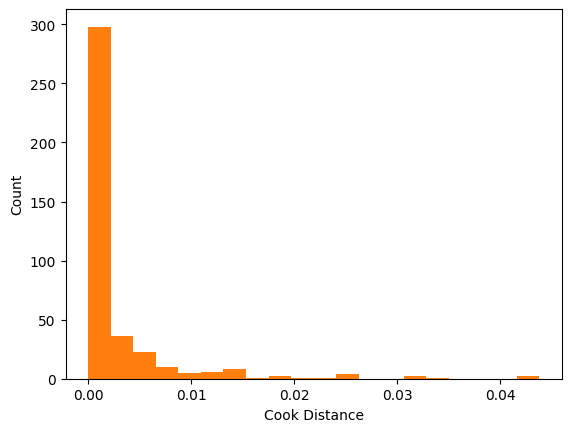

In [56]:
plt.hist(df_rename["Cook Distance"], bins=20)
plt.hist(df_rename["Cook Distance"], bins=20)
plt.xlabel("Cook Distance")
plt.ylabel("Count")

In [24]:
df_rename["Cook Distance"].max()

0.04380037730180259

Vzhledem k tomu, že nejvyšší hodnota Cookovy vzdálenosti dosahuje 0.044, není potřeba odstraňovat žádné body, které by ovlivňovaly lineární regresi.